In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/hist_india_vix_-05-10-2024-to-05-10-2025.csv')
df.head()
df.columns

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Prev. Close ', 'Change ',
       '% Change '],
      dtype='object')

In [3]:
df.columns=df.columns.str.strip()
df1=df[['Date','Open']]
df1['Date']=pd.to_datetime(df1['Date'])
df1.head()
df1.set_index('Date',inplace=True)
df1.head()


/tmp/ipython-input-2015399951.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date']=pd.to_datetime(df1['Date'])
/tmp/ipython-input-2015399951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date']=pd.to_datetime(df1['Date'])


,Open
Date,
2024-10-07,14.1275
2024-10-08,15.0800
2024-10-09,14.5875
2024-10-10,14.1225
2024-10-11,13.4950


In [4]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2024-10-07 to 2025-10-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    248 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [5]:
train_size=int(len(df1)*0.75)
train_data=df1[:train_size]
test_data=df1[train_size:]
print(train_data.shape)
print(test_data.shape)

(186, 1)
(62, 1)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_data=scaler.fit_transform(train_data)
test_data=scaler.transform(test_data)
print(train_data.shape)
print(test_data.shape)

(186, 1)
(62, 1)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         248 non-null    object 
 1   Open         248 non-null    float64
 2   High         248 non-null    float64
 3   Low          248 non-null    float64
 4   Close        248 non-null    float64
 5   Prev. Close  248 non-null    float64
 6   Change       248 non-null    float64
 7   % Change     248 non-null    float64
dtypes: float64(7), object(1)
memory usage: 15.6+ KB


In [8]:
x_train=[]
y_train=[]
for i in range(50,train_data.shape[0]):
  x_train.append(train_data[i-50:i,0])
  y_train.append(train_data[i,0])


In [9]:
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

NameError: name 'x' is not defined

In [13]:
x=x.reshape(x.shape[0],x.shape[1],1)
print(x.shape)
y=y.reshape(-1,1)
print(y.shape)

(136, 50, 1)
(136, 1)


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error

In [12]:
model=Sequential()
model.add(LSTM(units=30,return_sequences=True,input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=30,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=30,return_sequences=False))
model.add(Dropout(0.2))


model.add(Dense(units=1))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

In [14]:
history=model.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 453ms/step - loss: 0.1973 - mean_squared_error: 0.1973 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0853 - mean_squared_error: 0.0853 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0533 - val_mean_squared_error: 0.0533
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0110 - val_mean_square

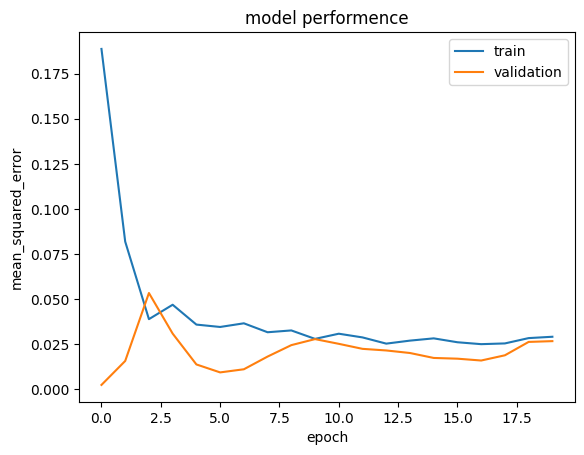

In [15]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model performence')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train','validation'])

In [16]:
y_pred=model.predict(x_test)
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


In [17]:
mae=mean_squared_error(y_test,y_pred)
print('mean_squared_error:',mae)

mean_squared_error: 4.598955280346092


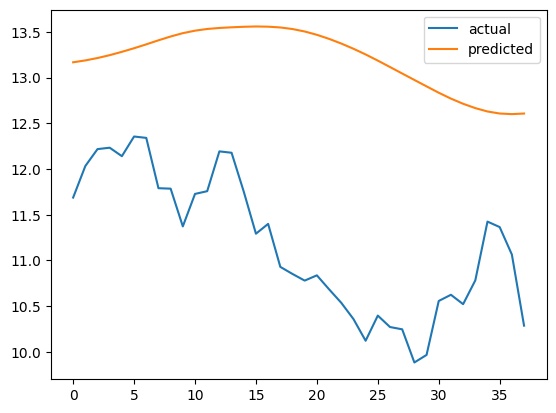

In [18]:
plt.plot(y_test,label='actual')
plt.plot(y_pred,label='predicted')
plt.legend()
plt.show()